# Import Libraries

In [1]:
import sys, os, re
import CityScapes_labels as labels
from CityScapes import CityScapesInterface
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#dataroot = '../../Datasets/cityscapes'
dataroot = '/mnt/data/course/psarin/inm705'
list_of_classes = ['__bgr__', 'car', 'person']

# Testing the interface

In [3]:
datasetinterface = CityScapesInterface(dataroot, list_of_classes, labels, 'train', 'semantic')

## Testing Bounding Boxes

In [4]:
label = datasetinterface.load_bounding_boxes(0)

In [5]:
label

{'classes': tensor([1, 1, 1, 1]),
 'bboxes': tensor([[ 805.,  418.,  959.,  535.],
         [ 619.,  367.,  847.,  635.],
         [ 192.,  371.,  754.,  768.],
         [   0.,  378.,  345., 1024.]])}

In [6]:
label['bboxes'].shape

torch.Size([4, 4])

## Testing Semnatic masks

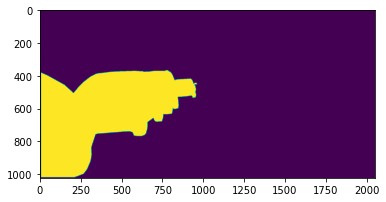

In [7]:
plt.imshow(datasetinterface.load_semantic_mask(0))
plt.show()

## Testing Instance masks

In [8]:
instance_masks = datasetinterface.load_instance_masks(0)

[0 1]


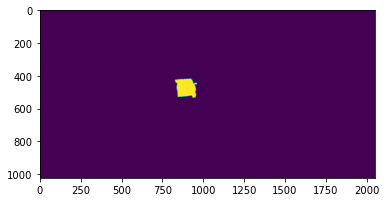

[0 1]


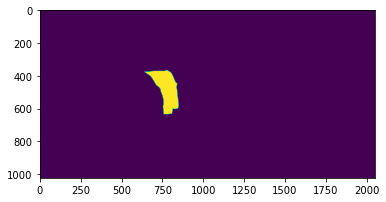

[0 1]


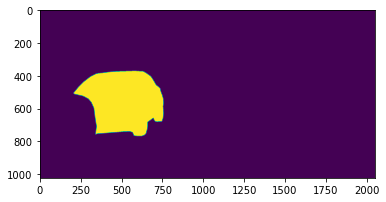

[0 1]


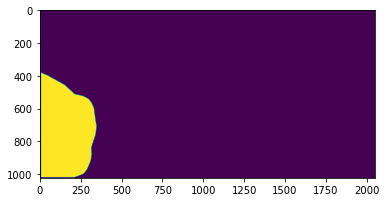

In [9]:
for mask in instance_masks:
    print(np.unique(mask))
    plt.imshow(mask)
    plt.show()

## Testing Bounding Boxes and Masks

In [10]:
label = datasetinterface.instance_segmentation_task(1)

In [11]:
label

{'classes': tensor([2, 1, 1, 1, 1, 1, 1, 1]),
 'bboxes': tensor([[1290.,  386., 1338.,  492.],
         [1350.,  393., 1412.,  461.],
         [1365.,  398., 1449.,  469.],
         [1482.,  391., 1621.,  485.],
         [1099.,  402., 1251.,  535.],
         [ 474.,  428.,  671.,  574.],
         [ 134.,  416.,  501.,  644.],
         [   0.,  417.,  168.,  722.]]),
 'masks': [tensor([[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8),
  tensor([[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8),
  tensor([[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
         

tensor(2)


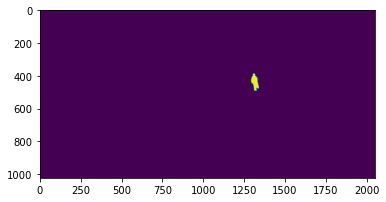

tensor(1)


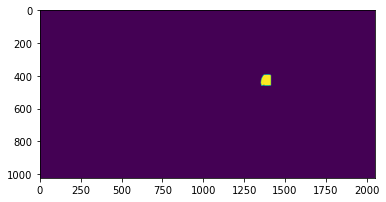

tensor(1)


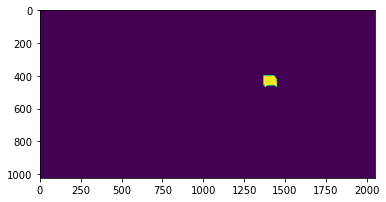

tensor(1)


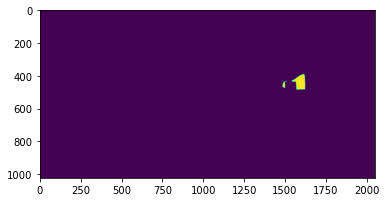

tensor(1)


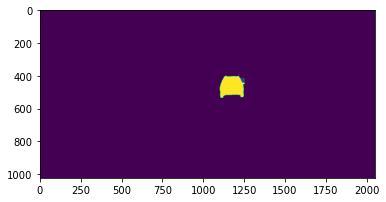

tensor(1)


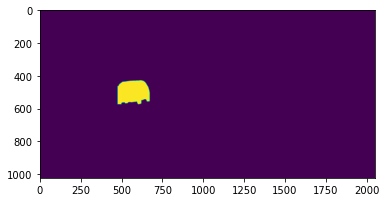

tensor(1)


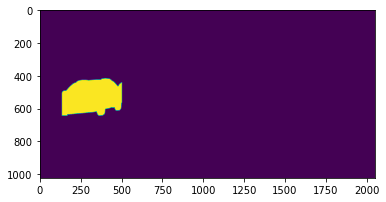

tensor(1)


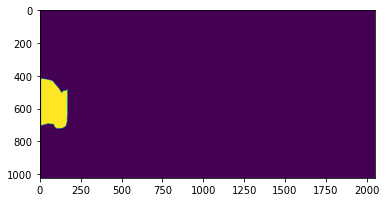

In [12]:
for idx in range(len(label['masks'])):
    print(label['classes'][idx])
    plt.imshow(label['masks'][idx])
    plt.show()

## Semantic Segmentation Test

In [13]:
import random

In [14]:
index = random.randint(0, len(datasetinterface.imgs))
img = datasetinterface.load_img(index, transform= False)
semantic_label = datasetinterface.semantic_segmentation_task(index)

[0 1 2]


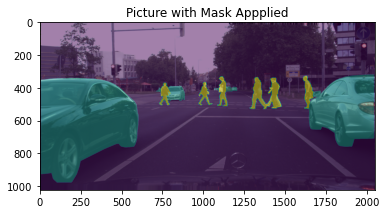

In [15]:
print(np.unique(semantic_label['mask']))
plt.imshow(img)
plt.imshow(semantic_label['mask'], alpha=0.5)
plt.title('Picture with Mask Appplied')
plt.show()

## Testing __getitem__ method

In [16]:
datasetinterface[0]

(0,
 tensor([[[-1.4519, -1.4348, -1.4519,  ..., -0.8868, -0.9382, -1.0238],
          [-1.4690, -1.4519, -1.4690,  ..., -0.9382, -1.0238, -1.1094],
          [-1.5375, -1.5375, -1.5375,  ..., -1.0067, -1.1094, -1.2122],
          ...,
          [-1.2807, -1.2807, -1.2636,  ..., -0.8183, -0.8354, -0.8526],
          [-1.2807, -1.2807, -1.2636,  ..., -0.8526, -0.8526, -0.8526],
          [-1.2807, -1.2807, -1.2636,  ..., -0.8526, -0.8697, -0.8697]],
 
         [[-1.4624, -1.4624, -1.4800,  ..., -0.8147, -0.9197, -1.0248],
          [-1.4975, -1.4800, -1.4975,  ..., -0.8497, -0.9723, -1.0948],
          [-1.5850, -1.5850, -1.5675,  ..., -0.9197, -1.0423, -1.1648],
          ...,
          [-1.2874, -1.2874, -1.2699,  ..., -0.7447, -0.7622, -0.7622],
          [-1.2874, -1.2874, -1.2699,  ..., -0.7622, -0.7797, -0.7797],
          [-1.2874, -1.2874, -1.2699,  ..., -0.7797, -0.7797, -0.7797]],
 
         [[-1.8070, -1.8070, -1.7895,  ..., -1.3538, -1.4061, -1.4584],
          [-1.8070, -1.7